In [1]:
!pip install tweepy

In [2]:
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import json
import time
from datetime import datetime
import seaborn as sns

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
news = ["@BBC", "@CBS", "@CNN", "@Fox", "@NYTimes"]
counter = 1
sentiments =[]

In [7]:
for source in news:
    tweets = api.user_timeline(source, count=100)
    
    tweetcount = 1       
    
    for tweet in tweets:
        
        print("Tweet %s: %s" % (counter, tweet["text"]))
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweetcount
        sentiments.append({"Media Source": source,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweetcount})
        tweetcount += 1
        counter +=1
        
        

Tweet 1: .@JasonManford gives us his words of wisdom on mental health during lockdown, and the power of laughter ❤️ https://t.co/Imno3mD6kx
Tweet 2: For details of organisations which offer advice and support with mental health, go online to https://t.co/rWDj404Gvz
Tweet 3: This scene where Marianne and Connell finally address their class difference and how it's affected their relationsh… https://t.co/SwYPjla1Ji
Tweet 4: Comedian @ItsTonySlattery meets experts to explore his psychological problems, finding out if he is definitely bipo… https://t.co/7614I03Iol
Tweet 5: To mark International Diversity Day, the BBC Director-General Tony Hall and UN Deputy Secretary-General Amina J Moh… https://t.co/qe9YYNQYSC
Tweet 6: Another #ThisCountry deleted scene from @bbcthree: more of Mandy's stories.  🙌📚
https://t.co/s7D6Sc4Jpt
Tweet 7: RT @HackerTDog: YOU ARE ALL INVITED TO PLAY MY QUIZ AT 7.30PM LIVE TONIGHT ON MY YOUTUBE CHANNEL! GO AND SUBSCRIBE TO ME https://t.co/kFDPk…
Tweet 8: ⁣More inform

Tweet 101: RT @broke: And we're LIVE! Join us on the @CBS Facebook right now for #JaimesHappyHour with @JaimeCamil and @IanKarmel from @latelateshow a…
Tweet 102: RT @Venuseswilliams: What have I gotten myself into?! Check out the @GameOn premiere next week on @CBS!  👀@RobGronkowski, @KeeganMKey, @Bob…
Tweet 103: Stay cool this summer with these summer essentials from the CBS Store. Shop water bottles, tanks, and more now:… https://t.co/IJGW2WKDQO
Tweet 104: RT @joshgroban: I’ll be on @CBSSunday this Sunday morning and doing a Facebook Live chat right after. I love this show and I’m so happy to…
Tweet 105: RT @letsmakeadeal: Wow, congrats @WayneBrady! 😍 https://t.co/23XI16Wjyv
Tweet 106: RT @BandB_CBS: Congratulations are in order for the #BoldandBeautiful nominees! 💫 Let's give these stars some love for their #DaytimeEmmy n…
Tweet 107: RT @PriceIsRight: Thank you for the nomination! 🤗🙏 https://t.co/7wzVmph9NC
Tweet 108: RT @YandR_CBS: Please join us in congratulating these outstanding

Tweet 201: "'The Empire Strikes Back' hit theaters forty years ago, on May 21, 1980. And no Jedi mind tricks are needed to mak… https://t.co/wKjTv45zBD
Tweet 202: President Trump travels to Michigan, and threatens to withhold funding from swing states looking to expand voting b… https://t.co/daxrVQOPJQ
Tweet 203: How do you think the pandemic will change the classroom? Join @AndersonCooper and @DrSanjayGupta for a new… https://t.co/bmle0TAXYW
Tweet 204: "I'm worried, obviously, it'd be foolish not to be worried with so many people dying... We get 10 to 15 million vis… https://t.co/Nhq585eRHq
Tweet 205: "I didn't want to give the press the pleasure of seeing it," President Trump said before showing off his fabric fac… https://t.co/pTu3iqfxs8
Tweet 206: Montgomery, Alabama, Mayor Steven Reed is considering a shelter-in-place order over an ICU bed shortage.

“We wante… https://t.co/hFk40aTbKG
Tweet 207: President Trump brought a navy blue mask stamped with the presidential seal to a Ford 

Tweet 301: @ow what is happening with these icons though
Tweet 302: why bother working on a reasonable verification system if you can make people fight for checkmarks

https://t.co/BYV0rjWb8N
Tweet 303: @meyerweb prime assholery
Tweet 304: you will never verify me, you cowards

https://t.co/3uT26tY9Ow
Tweet 305: RT @JillWetzler: Ahahahaha what a witty and clever joke about a tremendously biased and neglected feature that has been "on hold" for liter…
Tweet 306: me: *asks a question*

@AWSSupport:

@AWSSupport: if you’d like support that will be 3% of your bill

me: fine, *pa… https://t.co/bihzAynjJ3
Tweet 307: The worst support I have ever seen in my career is hands-down @AWSSupport @awscloud. 

Endless questions unanswered… https://t.co/gnrEN4EY1j
Tweet 308: In March, there were a lot of predictions on how the global crisis is going to hit tech companies. 

Some are true… https://t.co/QRwG0sHVY7
Tweet 309: @dan_abramov masculinity stereotyping.
Tweet 310: ”I didn’t develop any enviabl

Tweet 401: The FBI is opening an investigation into the death of Breonna Taylor, a black woman who was shot in her home by 3 w… https://t.co/zxcPlj86lE
Tweet 402: U.S. states are increasingly reducing barriers to voting by mail, seen by many as a necessary way to vote during th… https://t.co/XWo03pWLA6
Tweet 403: New York City’s commercial property owners are reporting a steep rise in unpaid rent by companies with office or re… https://t.co/U0VmiXZFAR
Tweet 404: Scientists estimate that there's a 70% chance the coming Atlantic hurricane season will produce between 13 to 19 na… https://t.co/chJnrXzWnn
Tweet 405: An attack that involved a gunman at the Naval Air Station Corpus Christi in Texas on Thursday was related to terror… https://t.co/8NizmNbsmH
Tweet 406: A watchdog won't open a criminal inquiry into Prime Minister Boris Johnson over claims that as London mayor he did… https://t.co/tUbUSEStD5
Tweet 407: The two dams that failed in Michigan were rated “high hazard,” meaning that a 

In [8]:

analysis = pd.DataFrame.from_dict(sentiments)


In [9]:
analysis_csv = analysis[['Media Source','Date','Text','Compound','Positive','Neutral','Negative','Tweet Count']]
analysis_csv.head()

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,@BBC,Thu May 21 20:30:00 +0000 2020,.@JasonManford gives us his words of wisdom on...,0.7650,0.268,0.732,0.000,1
1,@BBC,Thu May 21 19:02:17 +0000 2020,For details of organisations which offer advic...,0.4019,0.153,0.847,0.000,2
2,@BBC,Thu May 21 19:01:00 +0000 2020,This scene where Marianne and Connell finally ...,-0.1531,0.000,0.914,0.086,3
3,@BBC,Thu May 21 18:01:00 +0000 2020,Comedian @ItsTonySlattery meets experts to exp...,0.3818,0.241,0.636,0.123,4
4,@BBC,Thu May 21 16:20:13 +0000 2020,"To mark International Diversity Day, the BBC D...",0.0000,0.000,1.000,0.000,5


In [10]:
analysis_csv.to_csv("Media Tweets.csv")

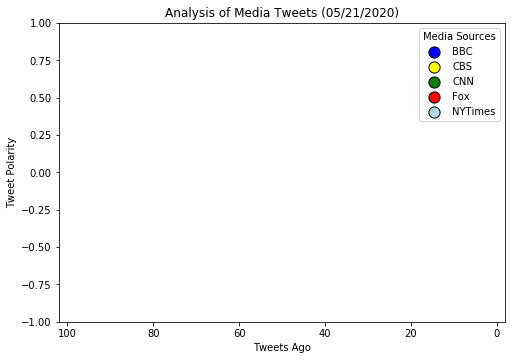

In [18]:
news_colors = {"BBC":"blue",
               "CBS":"yellow",
               "CNN":"green",
               "Fox":"red",
               "NYTimes": "lightblue"}

plt.figure(figsize = (8,5.5))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlim(102,-2, -1)
plt.ylim(-1,1)
for newsoutlet in news_colors.keys():
    df = analysis_csv[analysis_csv['Media Source'] == newsoutlet]
    analysis = plt.scatter(df["Tweet Count"],df["Compound"], label = newsoutlet, color = news_colors[newsoutlet], edgecolor = "black", s=125)
plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources')    
plt.show()
analysis.figure.savefig('Analysis of Media Tweets.png')


In [12]:
output = analysis_csv.groupby("Media Source")["Compound"].mean()
output

Media Source
@BBC        0.254952
@CBS        0.247691
@CNN        0.009480
@Fox        0.124251
@NYTimes   -0.068667
Name: Compound, dtype: float64

In [13]:
analysis_csv.head()

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,@BBC,Thu May 21 20:30:00 +0000 2020,.@JasonManford gives us his words of wisdom on...,0.7650,0.268,0.732,0.000,1
1,@BBC,Thu May 21 19:02:17 +0000 2020,For details of organisations which offer advic...,0.4019,0.153,0.847,0.000,2
2,@BBC,Thu May 21 19:01:00 +0000 2020,This scene where Marianne and Connell finally ...,-0.1531,0.000,0.914,0.086,3
3,@BBC,Thu May 21 18:01:00 +0000 2020,Comedian @ItsTonySlattery meets experts to exp...,0.3818,0.241,0.636,0.123,4
4,@BBC,Thu May 21 16:20:13 +0000 2020,"To mark International Diversity Day, the BBC D...",0.0000,0.000,1.000,0.000,5


In [14]:
x_axis = np.arange(len(output))

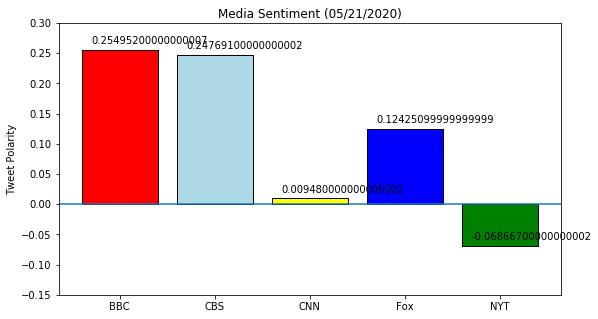

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize = (9,5))
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.ylabel("Tweet Polarity")
plt.title("Media Sentiment (%s)" % (time.strftime("%m/%d/%Y")))
plt.ylim(-.15, .3)
plt.axhline(y=0)

for newsoutlet in news_colors.keys():
    news = analysis_csv[analysis_csv['Media Source'] == newsoutlet]
    
    overall_media_sentiment = plt.bar(x_axis,output, color = {"lightblue","green", "yellow", "red", "blue"}, label = newsoutlet, edgecolor = "black")
    
for i, v in enumerate(output):
    plt.text(i-.3, v+.01, str(v).format(), color='black')
    
plt.xticks(x_locations, x_labels)
plt.show()
plt.savefig('Media Sentiment.png')